In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [3]:
train_path = r'D:\university\Thesis\final\Flower kath golap\1training'
test_path = r'D:\university\Thesis\final\Flower kath golap\2testing'
val_path = r'D:\university\Thesis\final\Flower kath golap\3vali'

Bloom


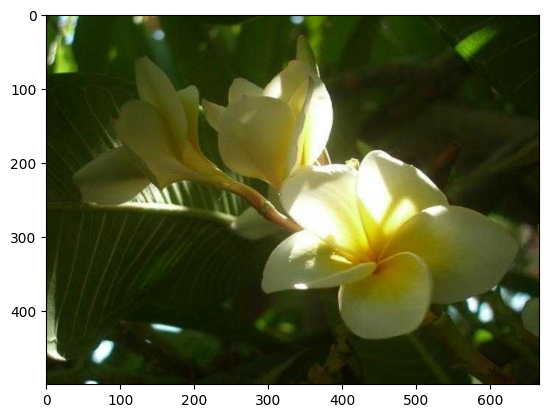

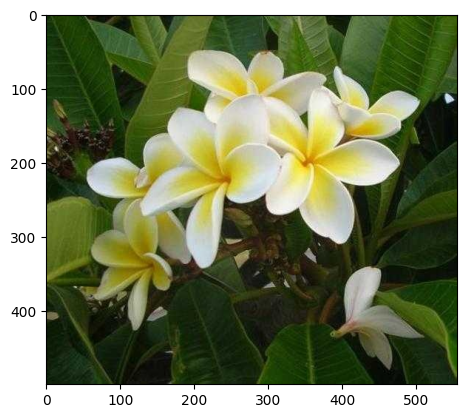

Post Bloom


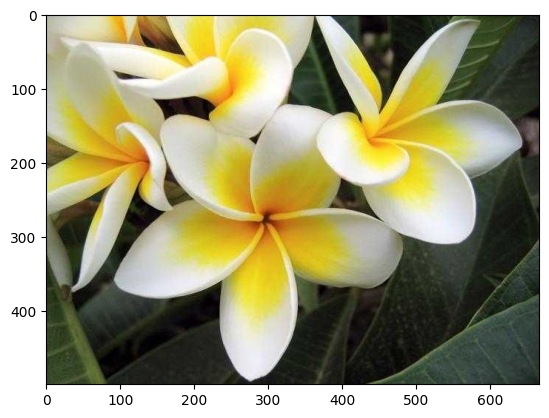

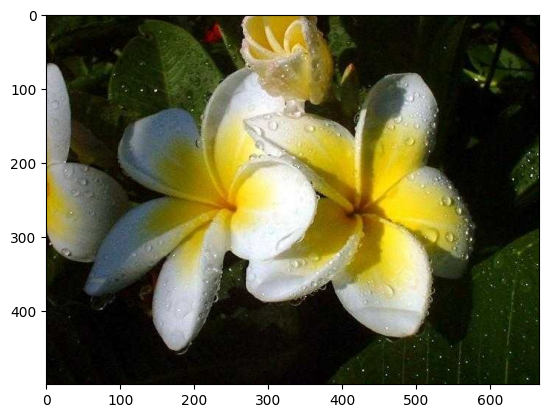

Pre Bloom


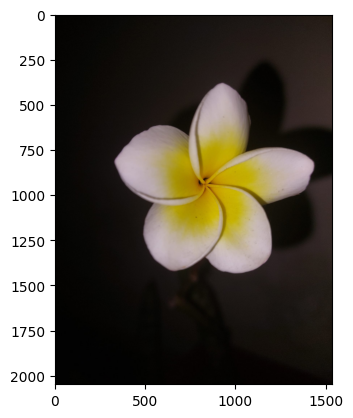

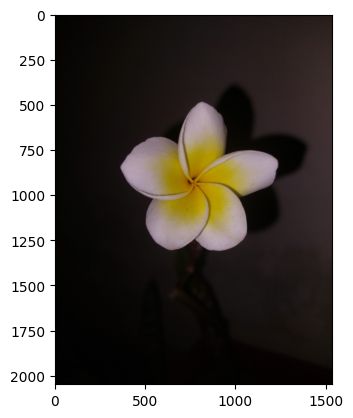

In [4]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [5]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [6]:
size = (250,250)

In [7]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [8]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [10]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [11]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 1170 images belonging to 3 classes.
Found 325 images belonging to 3 classes.
Found 210 images belonging to 3 classes.


In [12]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [13]:
train_class.class_indices

{'Bloom': 0, 'Post Bloom': 1, 'Pre Bloom': 2}

In [14]:
a = train_class.class_indices

In [15]:
y_train.shape,y_test.shape,y_val.shape

((1170,), (325,), (210,))

In [16]:
#x2
"""model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (250,250,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(25, activation = 'softmax'))"""

"""model3 = Sequential()
model3.add(Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu',input_shape=(250,250,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(5,activation='softmax'))"""

# (3) Create a sequential model
model3 = Sequential()

# 1st Convolutional Layer
model3.add(Conv2D(filters=96, input_shape=(250,250,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model3.add(Activation('relu'))
# Pooling 
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model3.add(BatchNormalization())

# 2nd Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 4th Convolutional Layer
model3.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Batch Normalisation
model3.add(BatchNormalization())

# 5th Convolutional Layer
model3.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model3.add(Activation('relu'))
# Pooling
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model3.add(BatchNormalization())

# Passing it to a dense layer
model3.add(Flatten())
# 1st Dense Layer
model3.add(Dense(4096, input_shape=(224*224*3,)))
model3.add(Activation('relu'))
# Add Dropout to prevent overfitting
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 2nd Dense Layer
model3.add(Dense(4096))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# 3rd Dense Layer
model3.add(Dense(1000))
model3.add(Activation('relu'))
# Add Dropout
model3.add(Dropout(0.4))
# Batch Normalisation
model3.add(BatchNormalization())

# Output Layer
model3.add(Dense(17))
model3.add(Activation('softmax'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 96)        34944     
                                                                 
 activation (Activation)     (None, 60, 60, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 20, 20, 256)       0

In [17]:
cnn=model3

In [18]:
for layer in cnn.layers:
    layer.trainable = False

x = Flatten()(cnn.output)
prediction = Dense(3, activation='softmax')(x)

model3 = Model(inputs=cnn.input, outputs=prediction)
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 96)        34944     
                                                                 
 activation (Activation)     (None, 60, 60, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       297395

In [19]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
#model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model3.summary()
model3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [20]:
#Training the CNN model1
#history = model3.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
#history3 = model3.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 12,batch_size = 3,shuffle=True)

Epoch 1/12
390/390 [==============================] - 33s 74ms/step - loss: 1.0838 - accuracy: 0.3974 - val_loss: 1.0944 - val_accuracy: 0.3571
Epoch 2/12
390/390 [==============================] - 30s 77ms/step - loss: 1.0757 - accuracy: 0.3974 - val_loss: 1.0977 - val_accuracy: 0.3571
Epoch 3/12
390/390 [==============================] - 27s 70ms/step - loss: 1.0740 - accuracy: 0.3974 - val_loss: 1.1001 - val_accuracy: 0.3571
Epoch 4/12
390/390 [==============================] - 31s 80ms/step - loss: 1.0738 - accuracy: 0.3974 - val_loss: 1.1016 - val_accuracy: 0.3571
Epoch 5/12
390/390 [==============================] - 33s 85ms/step - loss: 1.0735 - accuracy: 0.3974 - val_loss: 1.1025 - val_accuracy: 0.3571
Epoch 6/12
390/390 [==============================] - 33s 85ms/step - loss: 1.0737 - accuracy: 0.3957 - val_loss: 1.1018 - val_accuracy: 0.3571
Epoch 7/12
390/390 [==============================] - 28s 72ms/step - loss: 1.0739 - accuracy: 0.3974 - val_loss: 1.1006 - val_accuracy:

In [21]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [22]:
#x
vgg2 = VGG16(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False) 

In [23]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model1 = Model(inputs=vgg.input, outputs=prediction)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [24]:
#x
for layer in vgg2.layers:
    layer.trainable = False

x = Flatten()(vgg2.output)
prediction = Dense(3, activation='softmax')(x)

model2 = Model(inputs=vgg2.input, outputs=prediction)
model2.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

In [25]:
model1.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

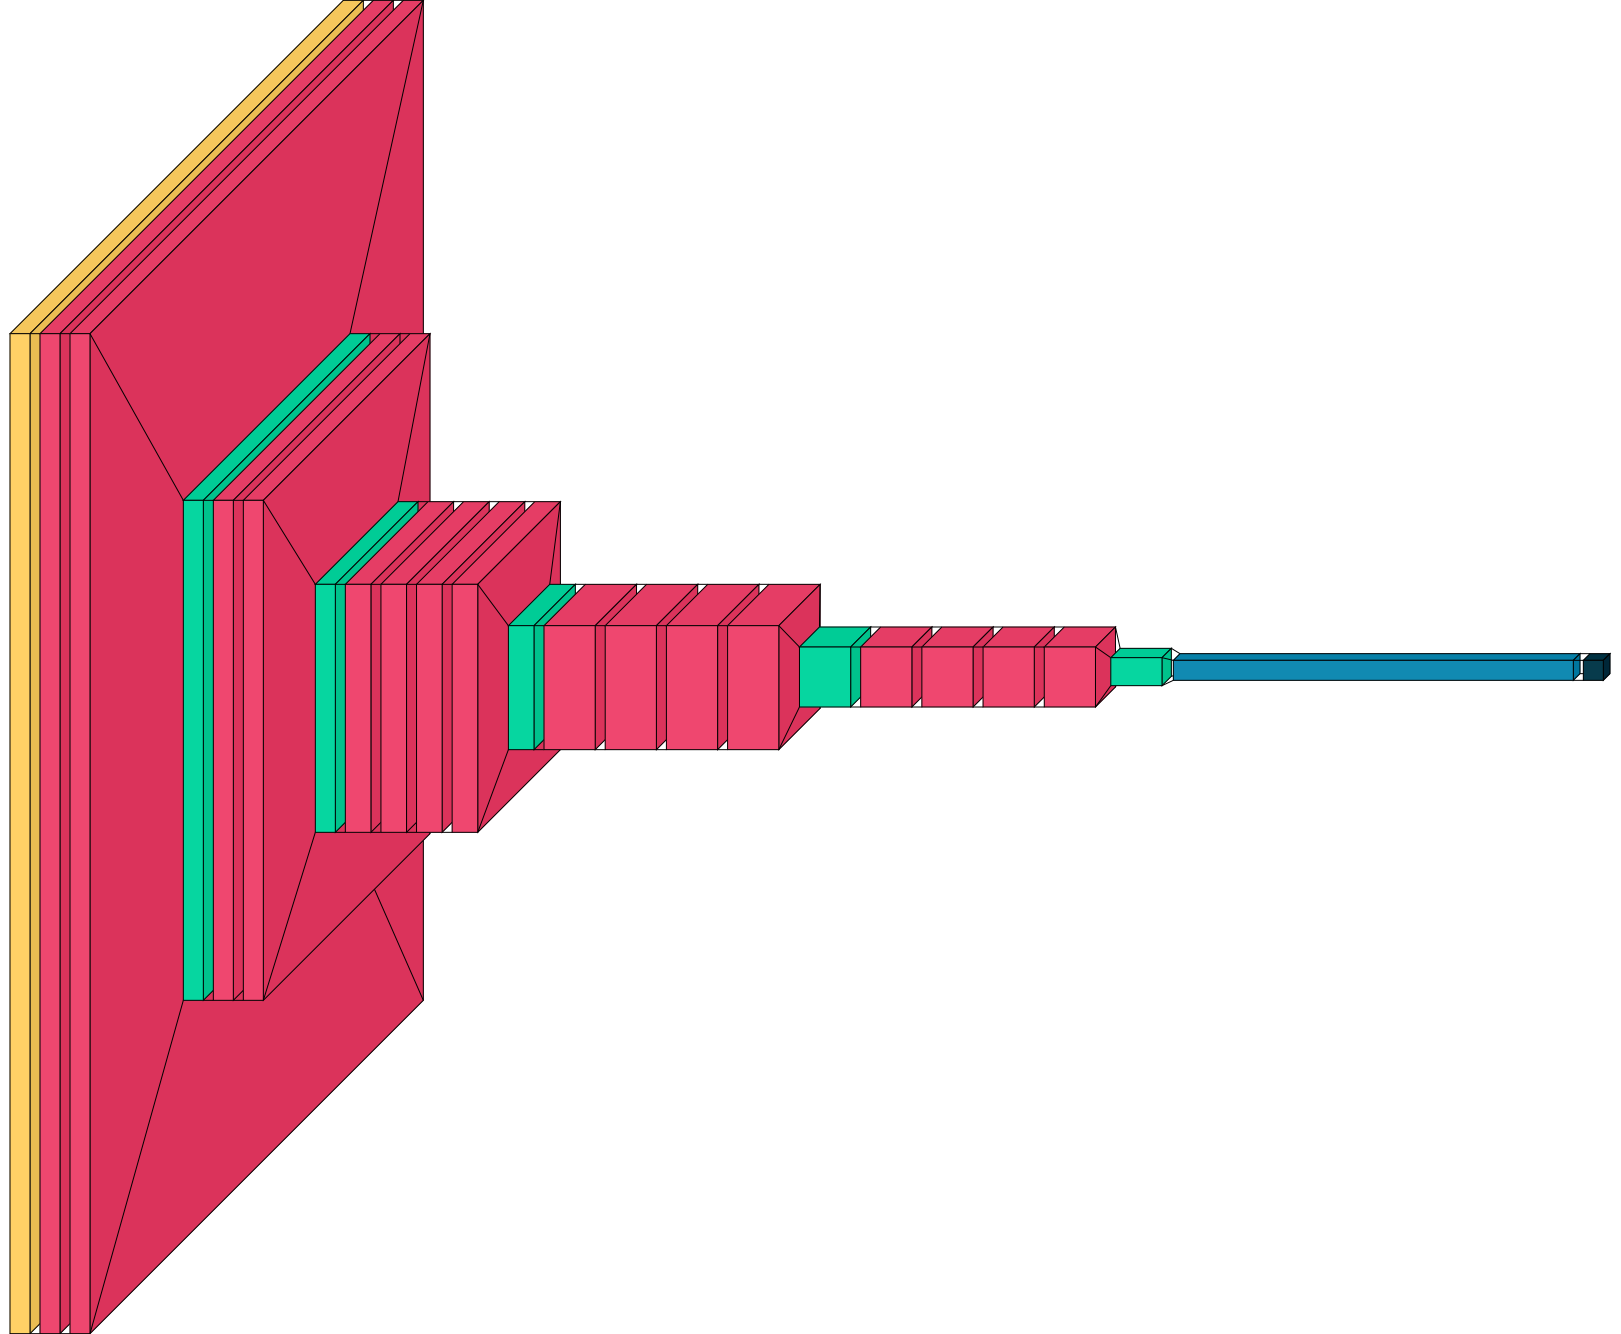

In [26]:
visualkeras.layered_view(model1)

In [27]:
#x
model2.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

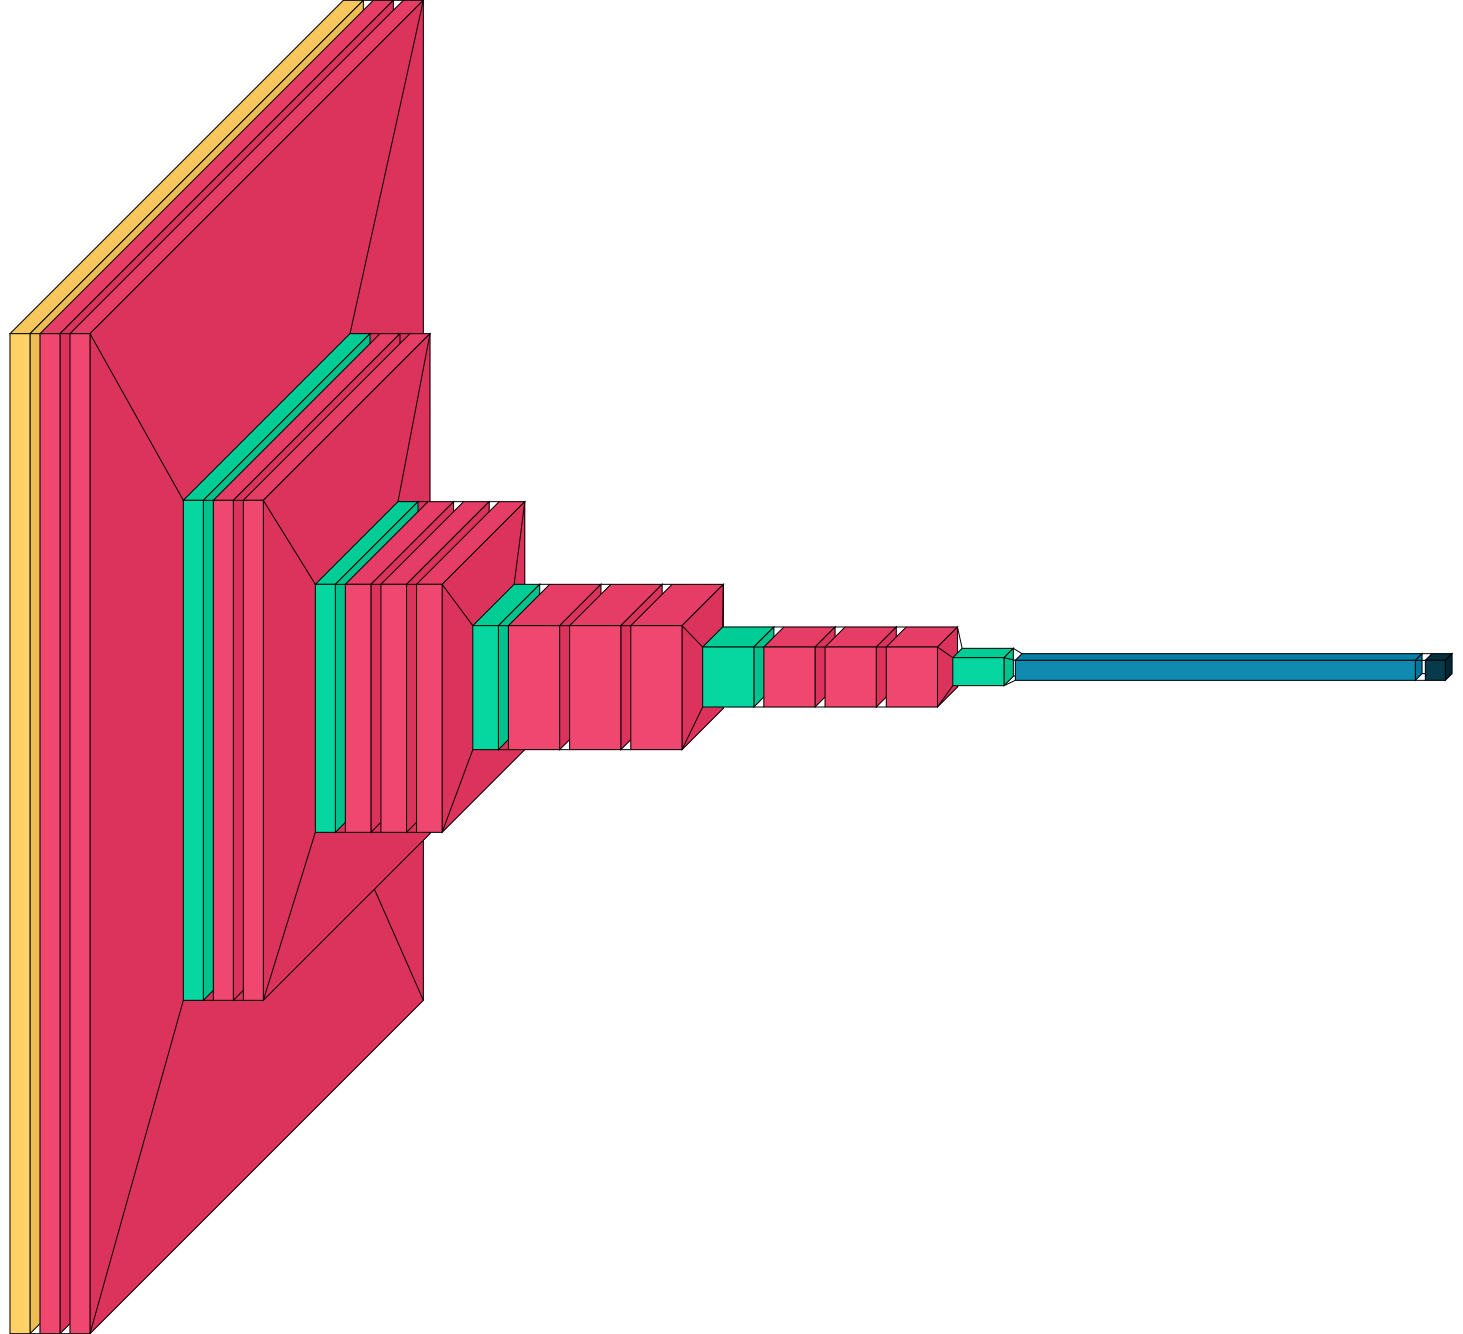

In [28]:
visualkeras.layered_view(model2)

In [29]:
# Fit
history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 2,batch_size = 30,
                    shuffle=True)

Epoch 1/2
39/39 [==============================] - 162s 4s/step - loss: 1.5257 - accuracy: 0.4342 - val_loss: 1.0580 - val_accuracy: 0.4714
Epoch 2/2
39/39 [==============================] - 161s 4s/step - loss: 0.7101 - accuracy: 0.6906 - val_loss: 1.0768 - val_accuracy: 0.5048


In [30]:
#x
# Fit
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 2,batch_size = 30,
                    shuffle=True)

Epoch 1/2
39/39 [==============================] - 129s 3s/step - loss: 1.3067 - accuracy: 0.4496 - val_loss: 1.0889 - val_accuracy: 0.4952
Epoch 2/2
39/39 [==============================] - 127s 3s/step - loss: 0.6893 - accuracy: 0.7094 - val_loss: 1.0468 - val_accuracy: 0.5095


In [31]:
#x
model1.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model1.hdf5')

In [32]:
#x
model2.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model2.hdf5')

In [33]:
#x
model3.save(r'D:\university\Thesis\final\Flower kath golap\saved model\model3.hdf5')

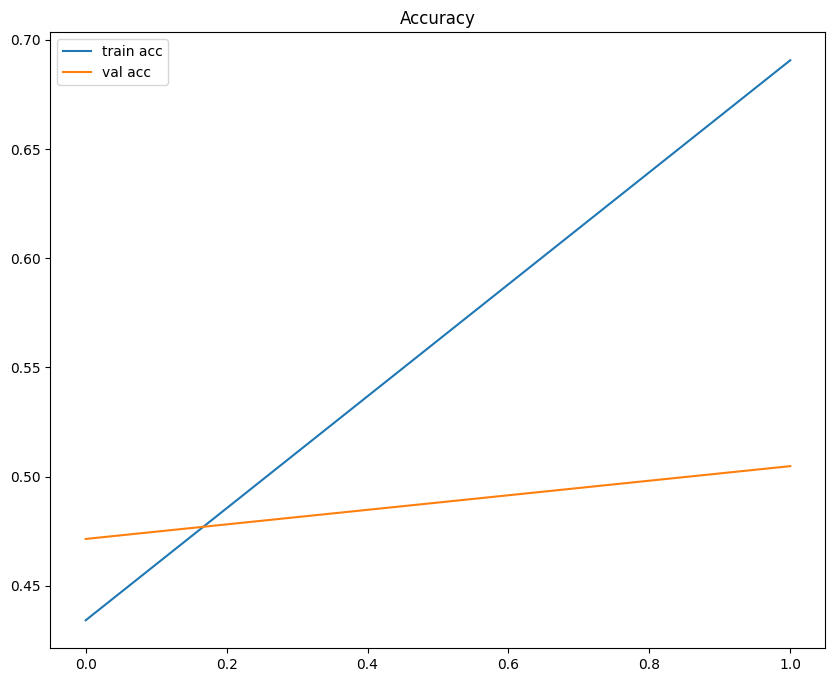

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

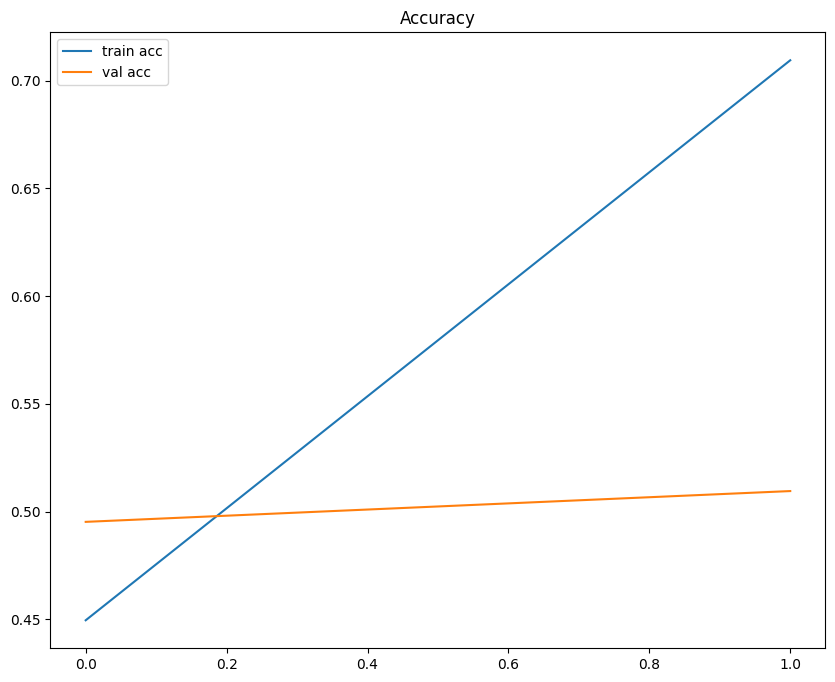

In [35]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

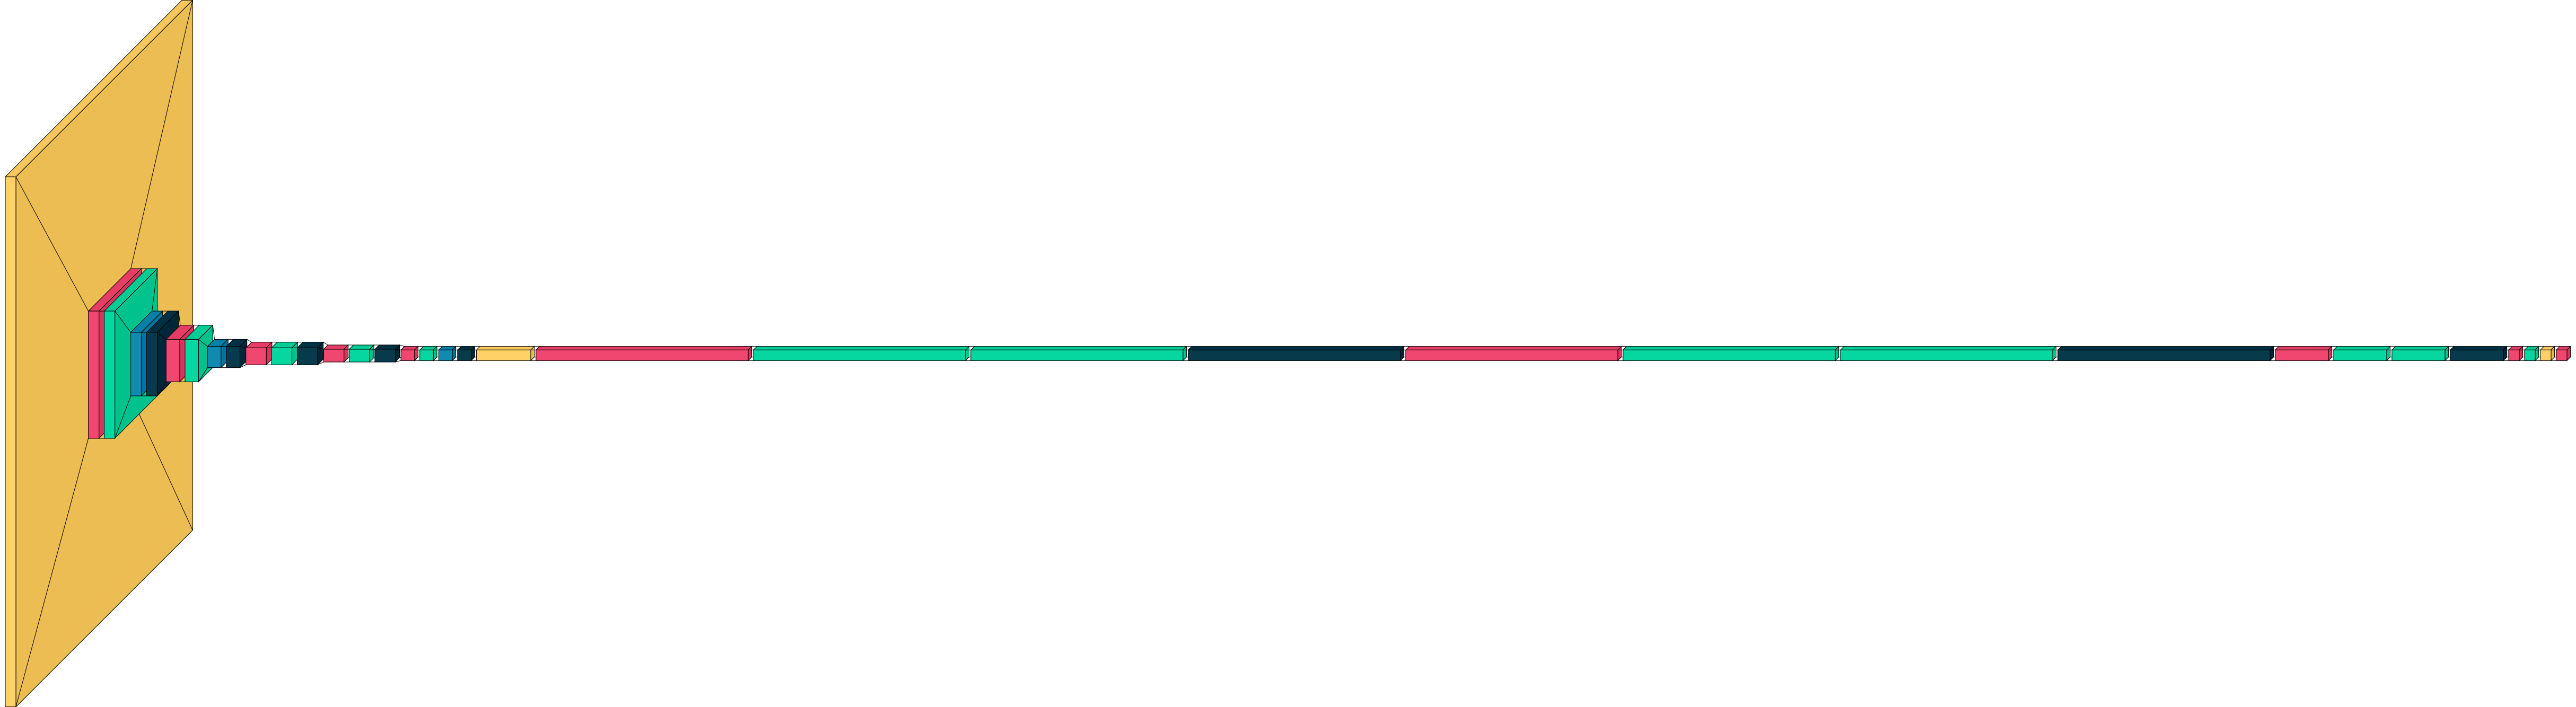

In [36]:
visualkeras.layered_view(model3)

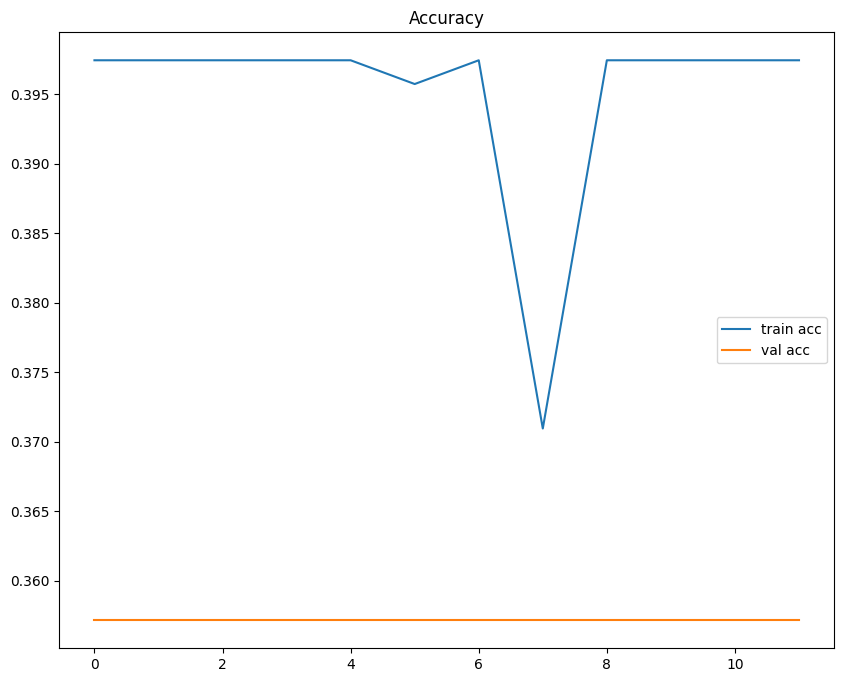

In [37]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [38]:
from keras.models import load_model

In [39]:
model1 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model1.hdf5')
model2 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model2.hdf5')
model3 = load_model(r'D:\university\Thesis\final\Flower kath golap\saved model\model3.hdf5')

In [40]:
models = [model1, model2, model3]

In [41]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

11/11 [==============================] - 3s 209ms/step


In [42]:
print(preds)

[[[0.04527671 0.06468128 0.89004195]
  [0.3143837  0.18762714 0.49798903]
  [0.34062588 0.4097742  0.24959992]
  ...
  [0.48395807 0.45848423 0.05755761]
  [0.256998   0.47399506 0.2690069 ]
  [0.08982154 0.22838256 0.6817959 ]]

 [[0.03781335 0.08880354 0.8733831 ]
  [0.5076267  0.36692506 0.1254482 ]
  [0.6589347  0.13857627 0.20248887]
  ...
  [0.1911315  0.7789108  0.02995764]
  [0.48078027 0.17305203 0.34616768]
  [0.04873975 0.06274959 0.8885106 ]]

 [[0.39222446 0.234093   0.3736826 ]
  [0.39222798 0.23412555 0.3736465 ]
  [0.39218548 0.23405772 0.37375677]
  ...
  [0.3922996  0.23407158 0.3736288 ]
  [0.39222518 0.23415843 0.3736164 ]
  [0.39221892 0.23413347 0.3736476 ]]]


In [43]:
ensemble_prediction = np.argmax(summed, axis=1)

In [44]:
print(ensemble_prediction)

[2 0 0 2 0 2 0 2 0 0 0 0 2 1 2 0 0 2 0 0 2 1 2 2 2 2 1 1 1 1 0 2 0 0 0 1 2
 0 2 2 1 2 2 1 0 1 2 0 0 0 2 2 0 2 2 0 2 0 1 0 0 0 2 2 1 1 2 0 2 2 0 1 2 1
 2 1 0 2 1 0 1 2 2 1 1 2 2 0 0 0 0 2 0 2 2 2 0 2 2 2 1 2 2 2 1 0 1 2 1 1 1
 0 1 1 1 2 1 2 1 2 2 2 2 0 1 2 2 2 1 0 1 1 2 2 1 2 1 1 2 0 2 2 1 2 2 2 0 0
 1 1 2 1 0 1 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 2 2 1 1 1 2 2 1 0 2
 2 1 2 2 2 2 2 2 0 1 0 1 2 2 0 0 2 0 2 0 2 2 0 0 0 2 0 0 2 0 2 0 2 2 2 2 2
 2 0 1 0 2 2 0 0 2 0 2 2 1 2 0 2 2 2 0 2 0 0 2 2 2 2 2 1 0 2 2 0 2 2 0 1 1
 1 1 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 0 2 2 2 1 0 2]


In [45]:
prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

11/11 [==============================] - 2s 218ms/step


In [46]:
print('= ', prediction1)

=  [[0.04527671 0.06468128 0.89004195]
 [0.3143837  0.18762714 0.49798903]
 [0.34062588 0.4097742  0.24959992]
 [0.08975892 0.16708793 0.74315315]
 [0.5591325  0.18736206 0.25350535]
 [0.20659989 0.08364773 0.7097523 ]
 [0.8136993  0.11736876 0.06893183]
 [0.14212    0.06074966 0.7971303 ]
 [0.19458388 0.2875095  0.51790655]
 [0.63361156 0.23506801 0.13132039]
 [0.32568336 0.26395008 0.41036665]
 [0.3143837  0.18762714 0.49798903]
 [0.1489392  0.0571525  0.7939083 ]
 [0.20787443 0.4821184  0.3100071 ]
 [0.01876268 0.19051811 0.7907192 ]
 [0.87365603 0.08770645 0.03863741]
 [0.36144578 0.3699197  0.26863453]
 [0.05375031 0.05952507 0.88672465]
 [0.4006018  0.17858501 0.42081317]
 [0.4006018  0.17858501 0.42081317]
 [0.27431187 0.14879714 0.5768909 ]
 [0.3216118  0.47390613 0.20448205]
 [0.11202703 0.12262529 0.7653476 ]
 [0.20149316 0.05646489 0.7420419 ]
 [0.30806267 0.3725809  0.31935632]
 [0.10324487 0.2934022  0.6033529 ]
 [0.1778271  0.5196308  0.3025422 ]
 [0.14300136 0.6259033  0

In [47]:
prediction1 = np.argmax(prediction1,axis=1)
prediction2 = np.argmax(prediction2,axis=1)
prediction3 = np.argmax(prediction3,axis=1)

In [48]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [49]:
#print('= ', x_test)

In [50]:
#print('= ', y_test)

In [51]:
accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)

In [52]:
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

In [53]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.4338461538461538
Accuracy Score for model2 =  0.5107692307692308
Accuracy Score for model3 =  0.3292307692307692
Accuracy Score for average ensemble =  0.5015384615384615


In [54]:
"""import cv2
image=cv2.imread(str)"""

'import cv2\nimage=cv2.imread(str)'

In [55]:
import random

In [56]:
print(ensemble_prediction)

[2 0 0 2 0 2 0 2 0 0 0 0 2 1 2 0 0 2 0 0 2 1 2 2 2 2 1 1 1 1 0 2 0 0 0 1 2
 0 2 2 1 2 2 1 0 1 2 0 0 0 2 2 0 2 2 0 2 0 1 0 0 0 2 2 1 1 2 0 2 2 0 1 2 1
 2 1 0 2 1 0 1 2 2 1 1 2 2 0 0 0 0 2 0 2 2 2 0 2 2 2 1 2 2 2 1 0 1 2 1 1 1
 0 1 1 1 2 1 2 1 2 2 2 2 0 1 2 2 2 1 0 1 1 2 2 1 2 1 1 2 0 2 2 1 2 2 2 0 0
 1 1 2 1 0 1 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 2 2 1 1 1 2 2 1 0 2
 2 1 2 2 2 2 2 2 0 1 0 1 2 2 0 0 2 0 2 0 2 2 0 0 0 2 0 0 2 0 2 0 2 2 2 2 2
 2 0 1 0 2 2 0 0 2 0 2 2 1 2 0 2 2 2 0 2 0 0 2 2 2 2 2 1 0 2 2 0 2 2 0 1 1
 1 1 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 0 2 2 2 1 0 2]


In [57]:
print(x_test)

[[[[0.34901961 0.53333333 0.40784314]
   [0.37647059 0.55294118 0.44705882]
   [0.39215686 0.56078431 0.4745098 ]
   ...
   [0.30588235 0.62352941 0.49411765]
   [0.30588235 0.63529412 0.50196078]
   [0.29803922 0.62745098 0.49411765]]

  [[0.36862745 0.54509804 0.43921569]
   [0.36078431 0.53333333 0.44313725]
   [0.38039216 0.54509804 0.47843137]
   ...
   [0.30588235 0.62352941 0.49411765]
   [0.28235294 0.63137255 0.47843137]
   [0.29019608 0.63921569 0.48627451]]

  [[0.36862745 0.54509804 0.44705882]
   [0.38039216 0.54509804 0.4745098 ]
   [0.38823529 0.54901961 0.49019608]
   ...
   [0.31372549 0.63137255 0.50196078]
   [0.25882353 0.63137255 0.45882353]
   [0.27843137 0.65098039 0.47843137]]

  ...

  [[0.1254902  0.23137255 0.15686275]
   [0.13333333 0.23529412 0.16470588]
   [0.1254902  0.22745098 0.15686275]
   ...
   [0.12156863 0.24705882 0.15294118]
   [0.12156863 0.24705882 0.15294118]
   [0.1254902  0.25098039 0.15686275]]

  [[0.10588235 0.20784314 0.1372549 ]
   [0.1

In [58]:
x=np.argmax(x_test)

In [59]:
print(x)

100


In [60]:
print(ensemble_prediction)

[2 0 0 2 0 2 0 2 0 0 0 0 2 1 2 0 0 2 0 0 2 1 2 2 2 2 1 1 1 1 0 2 0 0 0 1 2
 0 2 2 1 2 2 1 0 1 2 0 0 0 2 2 0 2 2 0 2 0 1 0 0 0 2 2 1 1 2 0 2 2 0 1 2 1
 2 1 0 2 1 0 1 2 2 1 1 2 2 0 0 0 0 2 0 2 2 2 0 2 2 2 1 2 2 2 1 0 1 2 1 1 1
 0 1 1 1 2 1 2 1 2 2 2 2 0 1 2 2 2 1 0 1 1 2 2 1 2 1 1 2 0 2 2 1 2 2 2 0 0
 1 1 2 1 0 1 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 2 2 1 1 1 2 2 1 0 2
 2 1 2 2 2 2 2 2 0 1 0 1 2 2 0 0 2 0 2 0 2 2 0 0 0 2 0 0 2 0 2 0 2 2 2 2 2
 2 0 1 0 2 2 0 0 2 0 2 2 1 2 0 2 2 2 0 2 0 0 2 2 2 2 2 1 0 2 2 0 2 2 0 1 1
 1 1 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 0 2 2 2 1 0 2]


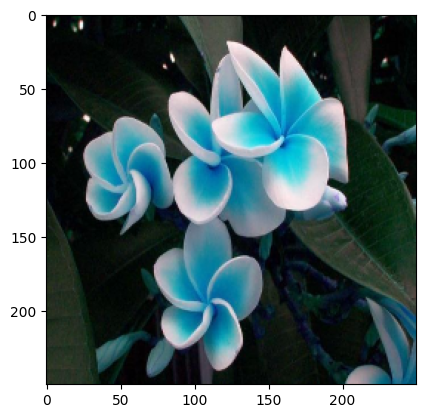

In [61]:
img_sample=random.randint(0,len(y_test))
plt.imshow(x_test[img_sample, :])
plt.show()

In [62]:
final=model1.predict(x[img_sample, :]).reshape(1, 250, 250, 3)

IndexError: invalid index to scalar variable.